# Merges and Joins

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as pyplot

In [2]:
df_left = DataFrame({"Key": ["X", "Y", "Z", "X", "Y"], "Data": range(5)})
df_left

,Key,Data
0,X,0
1,Y,1
2,Z,2
3,X,3
4,Y,4


In [3]:
df_right = DataFrame({"GroupData": [10, 20]}, index = ["X", "Y"])
df_right

,GroupData
X,10
Y,20


## Using MERGE function
#### The following merges both dataframes on chosen columns

In [4]:
pd.merge(df_left, df_right, left_on = "Key", right_index = True)

,Key,Data,GroupData
0,X,0,10
3,X,3,10
1,Y,1,20
4,Y,4,20


## Using JOIN function
#### INNER JOIN only works when dataframes have common INDEXES

In [5]:
# index in both dataframes are not equal therefore there are no common values - thus inner join will not work
df2 = df_left.join(df_right, how = "inner")
df2

,Key,Data,GroupData


In [6]:
# use an outer join to connect both tables without a common index
df3 = df_left.join(df_right, how = "outer")
df3

,Key,Data,GroupData
0,X,0.0,NaN
1,Y,1.0,NaN
2,Z,2.0,NaN
3,X,3.0,NaN
4,Y,4.0,NaN
X,NaN,NaN,10.0
Y,NaN,NaN,20.0


# Concatenation

In [7]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [8]:
# adds arr in a column-wise manner (i.e. next to each other)
np.concatenate([arr, arr], axis = 1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [9]:
# adds arr in a row-wise manner (i.e. on top of each other)
np.concatenate([arr, arr], axis = 0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

## Concatenation in Series

In [10]:
ser1 = Series([0, 1, 2], index = ["T", "U", "V"])
ser2 = Series([3, 4], index = ["W", "X"])

### Concatenates COLUMN-wise - creates 2 columns for both series

In [11]:
pd.concat([ser1, ser2], axis = 1)

,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
W,NaN,3.0
X,NaN,4.0


### Concatenates ROW-wise - creates one column with both series values

In [12]:
pd.concat([ser1, ser2], axis = 0)

T    0
U    1
V    2
W    3
X    4
dtype: int64

In [13]:
# labels the different series
pd.concat([ser1, ser2], keys = ["cat1", "cat2"])

cat1  T    0
      U    1
      V    2
cat2  W    3
      X    4
dtype: int64

## Concatenation in DataFrames

In [14]:
df1 = DataFrame(np.random.randn(4, 3), columns = ["X", "Y", "Z"])
df2 = DataFrame(np.random.randn(3, 3), columns = ["Y", "Q", "X"])

### Adds in ROW-wise manner (on top of each other)

In [15]:
# Note the repetition of index values
pd.concat([df1, df2])

,X,Y,Z,Q
0,-0.127331,0.102265,0.298856,NaN
1,-1.230536,-0.993078,-1.395469,NaN
2,0.204263,-0.543215,0.148285,NaN
3,-1.382429,-0.197133,0.227717,NaN
0,1.402489,0.399820,NaN,0.844587
1,0.895883,0.183778,NaN,1.318618
2,-0.221101,-0.451368,NaN,0.044762


In [16]:
# Changes the index so that they are sequential - ignores original index values from both dataframes
pd.concat([df1, df2], ignore_index = True)

,X,Y,Z,Q
0,-0.127331,0.102265,0.298856,NaN
1,-1.230536,-0.993078,-1.395469,NaN
2,0.204263,-0.543215,0.148285,NaN
3,-1.382429,-0.197133,0.227717,NaN
4,1.402489,0.399820,NaN,0.844587
5,0.895883,0.183778,NaN,1.318618
6,-0.221101,-0.451368,NaN,0.044762


### Adds COLUMN-wise manner (next to each other)

In [17]:
pd.concat([df1, df2], axis = 1)

,X,Y,Z,Y,Q,X
0,-0.127331,0.102265,0.298856,0.399820,0.844587,1.402489
1,-1.230536,-0.993078,-1.395469,0.183778,1.318618,0.895883
2,0.204263,-0.543215,0.148285,-0.451368,0.044762,-0.221101
3,-1.382429,-0.197133,0.227717,NaN,NaN,NaN


# Combining

### in Series

In [18]:
Sales1 = Series([10000, np.nan, 20000, np.nan, 30000, np.nan], 
                index = ["East", "West", "North", "South", "NorthEast", "SouthEast"])
Sales1

East         10000.0
West             NaN
North        20000.0
South            NaN
NorthEast    30000.0
SouthEast        NaN
dtype: float64

In [19]:
Sales2 = Series([12000, 14000, 16000, 18000, 20000, 22000], 
                index = ["East", "West", "North", "South", "NorthEast", "SouthEast"])
Sales2

East         12000
West         14000
North        16000
South        18000
NorthEast    20000
SouthEast    22000
dtype: int64

#### The following replaces NULL values in Sales1 with values from Sales2 otherwise prints Sales1 values

In [20]:
Series(np.where(pd.isnull(Sales1), Sales2, Sales1), index = Sales1.index)

East         10000.0
West         14000.0
North        20000.0
South        18000.0
NorthEast    30000.0
SouthEast    22000.0
dtype: float64

In [21]:
# This does the same function as the code above
Sales1.combine_first(Sales1)

East         10000.0
West             NaN
North        20000.0
South            NaN
NorthEast    30000.0
SouthEast        NaN
dtype: float64

### in DataFrames

In [22]:
nan = np.nan
df_Sales1 = DataFrame({"East": [1500, nan, 3500, nan], 
                      "West": [nan, 45000, nan, 5500],
                      "South": [6500, nan, 7500, nan]})
df_Sales1

,East,West,South
0,1500.0,NaN,6500.0
1,NaN,45000.0,NaN
2,3500.0,NaN,7500.0
3,NaN,5500.0,NaN


In [23]:
df_Sales2 = DataFrame({"East": [1200, 1300, nan, 1600, 1800], 
                      "West": [nan, 5000, 6000, 7000, 8000]})
df_Sales2

,East,West
0,1200.0,NaN
1,1300.0,5000.0
2,NaN,6000.0
3,1600.0,7000.0
4,1800.0,8000.0


In [24]:
df_Sales1.combine_first(df_Sales2)

,East,South,West
0,1500.0,6500.0,NaN
1,1300.0,NaN,45000.0
2,3500.0,7500.0,6000.0
3,1600.0,NaN,5500.0
4,1800.0,NaN,8000.0


# Pivot

In [25]:
import seaborn as sns
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = sns.load_dataset("flights")

# retrieves first 5 records
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
# retrieves last 5 records
df.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


### Creating a pivot table

In [28]:
df_piv = df.pivot("year", "month", "passengers")
df_piv

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [29]:
df = pd.read_excel("Jessample1.xlsx")
df

,date,Salesperson,value
0,2000-01-03,Allen,20000
1,2000-01-03,Allen,12000
2,2000-01-04,Allen,15000
3,2000-01-05,Allen,25000
4,2000-01-03,Mathew,3500
5,2000-01-04,Mathew,8000
6,2000-01-04,Mathew,6500
7,2000-01-05,Mathew,7500
8,2000-01-03,Clarke,6578
9,2000-01-04,Clarke,5467


#### By default, the aggregate function is MEAN

In [30]:
df_piv = df.pivot_table(index = "date", columns = "Salesperson", values = "value", aggfunc = "sum")
df_piv

Salesperson,Allen,Clarke,Don,Mathew
date,,,,
2000-01-03,32000,6578,8900,3500
2000-01-04,15000,5467,7000,14500
2000-01-05,25000,7790,6500,7500


# Grouping Data

In [31]:
group = df.groupby("Salesperson")

#### prints everything inside GROUP2 as a BLOCK

In [32]:
for block in df.groupby("Salesperson"):
    print(block)

('Allen',         date Salesperson  value
0 2000-01-03       Allen  20000
1 2000-01-03       Allen  12000
2 2000-01-04       Allen  15000
3 2000-01-05       Allen  25000)
('Clarke',          date Salesperson  value
8  2000-01-03      Clarke   6578
9  2000-01-04      Clarke   5467
10 2000-01-05      Clarke   7790)
('Don',          date Salesperson  value
11 2000-01-03         Don   8900
12 2000-01-04         Don   7000
13 2000-01-05         Don   6500)
('Mathew',         date Salesperson  value
4 2000-01-03      Mathew   3500
5 2000-01-04      Mathew   8000
6 2000-01-04      Mathew   6500
7 2000-01-05      Mathew   7500)


#### prints everything in GROUP2 - LINE BY LINE

In [33]:
for block in group:
    for line in block:
        print(line)

Allen
        date Salesperson  value
0 2000-01-03       Allen  20000
1 2000-01-03       Allen  12000
2 2000-01-04       Allen  15000
3 2000-01-05       Allen  25000
Clarke
         date Salesperson  value
8  2000-01-03      Clarke   6578
9  2000-01-04      Clarke   5467
10 2000-01-05      Clarke   7790
Don
         date Salesperson  value
11 2000-01-03         Don   8900
12 2000-01-04         Don   7000
13 2000-01-05         Don   6500
Mathew
        date Salesperson  value
4 2000-01-03      Mathew   3500
5 2000-01-04      Mathew   8000
6 2000-01-04      Mathew   6500
7 2000-01-05      Mathew   7500


In [34]:
group2 = df.groupby("date")

In [35]:
for block in group2:
    for line in block:
        print(line)

2000-01-03 00:00:00
         date Salesperson  value
0  2000-01-03       Allen  20000
1  2000-01-03       Allen  12000
4  2000-01-03      Mathew   3500
8  2000-01-03      Clarke   6578
11 2000-01-03         Don   8900
2000-01-04 00:00:00
         date Salesperson  value
2  2000-01-04       Allen  15000
5  2000-01-04      Mathew   8000
6  2000-01-04      Mathew   6500
9  2000-01-04      Clarke   5467
12 2000-01-04         Don   7000
2000-01-05 00:00:00
         date Salesperson  value
3  2000-01-05       Allen  25000
7  2000-01-05      Mathew   7500
10 2000-01-05      Clarke   7790
13 2000-01-05         Don   6500


# Splitting, Applying and Combining

In [36]:
df = pd.read_excel("Weather.xlsx")
df

,Day,City,Temperature,Wind speed
0,2019-01-01,Newyork,32,6
1,2019-01-02,Newyork,36,7
2,2019-01-03,Newyork,28,12
3,2019-01-04,Newyork,33,7
4,2019-01-01,Sydney,90,5
5,2019-01-02,Sydney,85,12
6,2019-01-03,Sydney,87,15
7,2019-01-04,Sydney,92,5
8,2019-01-01,Paris,45,20
9,2019-01-02,Paris,50,13


In [37]:
group = df.groupby("City")

#### The following is a quicker way of using the GROUPBY for loop

In [38]:
for block, line in group:
    print(block)
    print(line)

Newyork
         Day     City  Temperature  Wind speed
0 2019-01-01  Newyork           32           6
1 2019-01-02  Newyork           36           7
2 2019-01-03  Newyork           28          12
3 2019-01-04  Newyork           33           7
Paris
          Day   City  Temperature  Wind speed
8  2019-01-01  Paris           45          20
9  2019-01-02  Paris           50          13
10 2019-01-03  Paris           54           8
11 2019-01-04  Paris           42          10
Sydney
         Day    City  Temperature  Wind speed
4 2019-01-01  Sydney           90           5
5 2019-01-02  Sydney           85          12
6 2019-01-03  Sydney           87          15
7 2019-01-04  Sydney           92           5


### Accessing a specific group

In [39]:
group.get_group("Paris")

,Day,City,Temperature,Wind speed
8,2019-01-01,Paris,45,20
9,2019-01-02,Paris,50,13
10,2019-01-03,Paris,54,8
11,2019-01-04,Paris,42,10


In [40]:
# finds the maximum values in each column
group.max()

,Day,Temperature,Wind speed
City,,,
Newyork,2019-01-04,36,12
Paris,2019-01-04,54,20
Sydney,2019-01-04,92,15


In [41]:
# finds the maximum value in a specific column
group["Temperature"].max()

City
Newyork    36
Paris      54
Sydney     92
Name: Temperature, dtype: int64

In [42]:
# finds the average value for each colum
group.mean()

,Temperature,Wind speed
City,,
Newyork,32.25,8.00
Paris,47.75,12.75
Sydney,88.50,9.25


In [43]:
# finds the average value in a specific column
group["Temperature"].mean()

City
Newyork    32.25
Paris      47.75
Sydney     88.50
Name: Temperature, dtype: float64

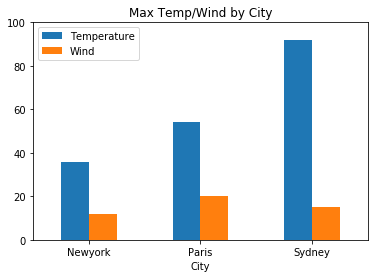

In [58]:
group.agg(Temperature = ("Temperature", "max"),
         Wind = ("Wind speed", "max")).plot(kind = "bar", ylim = (0, 100), title = "Max Temp/Wind by City", rot = 0)

# Cross-tabulation
### Finding the relationship between 2 independent columns

In [66]:
df = pd.read_csv("train.csv")

In [67]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [68]:
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [87]:
pd.crosstab(df.Survived, df.Pclass).apply(lambda r: r/r.sum(), axis = 1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


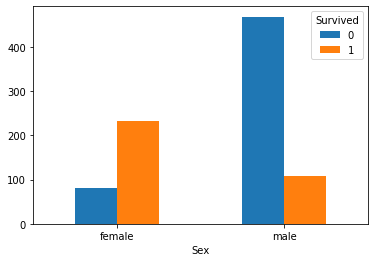

In [80]:
# relationship between gender and survivors
sg = pd.crosstab(df.Sex, df.Survived)
sg.plot.bar(rot = 0)

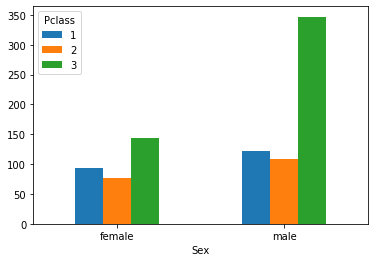

In [84]:
# relationship between gender and class
gc = pd.crosstab(df.Sex, df.Pclass)
sc.plot.bar(rot = 0)